# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
PATH_TO_ENV = "Reacher_Linux/Reacher.x86"
BRAIN = "ReacherBrain"
TRAINING = True

env = UnityEnvironment(file_name=PATH_TO_ENV, no_graphics=TRAINING)

ACTION_SIZE = env.brains[BRAIN].vector_action_space_size
STATE_SIZE = env.brains[BRAIN].vector_observation_space_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[BRAIN]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
print('Size of each action:', ACTION_SIZE)

# examine the state space 
states = env_info.vector_observations
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], STATE_SIZE))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


# Convenience functions

In [4]:
def act(env, actions, brain_name=BRAIN) -> tuple:
    """Sends actions to the environment env and observes the results.
    Returns a tuple of rewards, next_states, dones (One per agent)"""
    action_result = env.step(actions)[brain_name] # Act on the environment and observe the result
    return (action_result.rewards,
            action_result.vector_observations, # next states
            action_result.local_done) # True if the episode ended
    
def reset(env, training=TRAINING, brain_name=BRAIN) -> np.ndarray:
    """Syntactic sugar for resetting the unity environment"""
    return env.reset(train_mode=training)[brain_name].vector_observations

# Prepare the training

In [5]:
#from IPython.display import clear_output
np.set_printoptions(precision=3, suppress=True)

In [6]:
# Profiling (optional)
import cProfile
profiling = False # Set to True to profile execution time
if profiling:
    profile = cProfile.Profile()

In [7]:
# Invite our agent & import utils
from ddpg_agent import Agent
import torch

In [8]:
def train(agent, env, num_episodes, log_freq, max_t=20000, profiling=False, profile=None):        
    score_hist = np.zeros((num_agents, 1))
    if profiling: 
        profile.enable()
    
    # Train
    for i in range(num_episodes):
        states = reset(env)
        scores = np.zeros(num_agents)
        for j in range(max_t): # Safer than while
            # Decide
            #state = states.squeeze() # One agent only
            actions = agent.decide(states)  # Choose an action based on the state
            #actions = np.expand_dims(action, 0) # One agent only
            # Act
            rewards, next_states, dones = act(env, actions)     # Send the actions to the environment
            scores += rewards                         # update the score (for each agent)
            # Learn
            agent.step(states, actions, rewards[0], next_states[0], dones[0]) # Learn step
            # Step
            states = next_states                               # roll over states to next time step
            # Exit
            if np.any(dones):                                  # exit loop if episode finished
                break       
        # Logging
        score_hist = np.concatenate((score_hist, scores[:, None]), axis=1)
        if (i % log_freq == 0) and (i > 0):
            print(f'Avg. score episodes {i-log_freq+1}-{i+1}: {np.mean(score_hist.squeeze()[-log_freq:])}')
        
        if np.mean(score_hist.squeeze()[-100:]) >= 30:
            print(f'Solved in {i} steps!')
            break

    if profiling: 
        profile.disable()
        
    return score_hist.squeeze()

In [9]:
%%time
agent = Agent(STATE_SIZE, ACTION_SIZE, np.random.randint(1e5), cuda=True)
score_hist = train(agent, env, num_episodes=500, log_freq=10)

Avg. score episodes 1-11: 0.5839999869465828
Avg. score episodes 11-21: 1.471999967098236
Avg. score episodes 21-31: 1.1939999733120203
Avg. score episodes 31-41: 1.6349999634549022
Avg. score episodes 41-51: 1.9349999567493796
Avg. score episodes 51-61: 3.458999922685325
Avg. score episodes 61-71: 3.3439999252557753
Avg. score episodes 71-81: 4.0689999090507625
Avg. score episodes 81-91: 5.366999880038202
Avg. score episodes 91-101: 6.273999859765172
Avg. score episodes 101-111: 6.341999858245254
Avg. score episodes 111-121: 6.070999864302576
Avg. score episodes 121-131: 11.157999750599265
Avg. score episodes 131-141: 12.683999716490508
Avg. score episodes 141-151: 11.801999736204744
Avg. score episodes 151-161: 16.250999636761843
Avg. score episodes 161-171: 16.33399963490665
Avg. score episodes 171-181: 16.914999621920288
Avg. score episodes 181-191: 21.923999509960414
Avg. score episodes 191-201: 25.11099943872541
Avg. score episodes 201-211: 23.420999476499855
Avg. score episodes 

# Plotting + visualizing

In [10]:
from matplotlib import pyplot as plt
#import seaborn as sns

In [11]:
def moving_average(signal:np.ndarray , period: int):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return np.array(buffer)

#def moving_std(signal:np.ndarray , period: int):
#    buffer = [np.nan] * period
#    for i in range(period,len(signal)):
#        buffer.append(signal[i-period:i].std())
#    return np.array(buffer)

(0, 300)

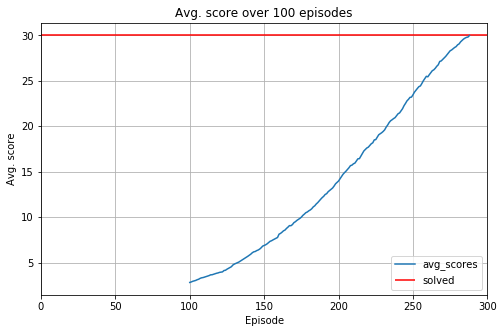

In [16]:
length = 100
avg_scores = moving_average(score_hist, length)
plt.figure(figsize=(8,5))
plt.plot(avg_scores, label='avg_scores')
plt.hlines(30, xmin=0, xmax=300, colors='r', label='solved')
plt.grid()
plt.xlabel('Episode')
plt.ylabel('Avg. score')
plt.title(f'Avg. score over {length} episodes')
plt.legend(loc='lower right')
plt.xlim((0, 300))

# Save models

In [13]:
from datetime import datetime
def save_agent(agent, name=None, avg_scores=None):
    """Saves the agent's parameters and the underlying pytorch model"""
    checkpoint = {'actor_state_dict': agent.actor_local.state_dict(),
                  'critic_state_dict': agent.critic_local.state_dict(),
                  'score_hist': score_hist}
    if not name:
        # Standard name: score-episodes-date
        name = f'{round(avg_scores[-1],1)}-{len(avg_scores)}-{datetime.strftime(datetime.now(),"%d.%m.%y_%H.%M")}'
        
    torch.save(checkpoint, f'models/{name}-checkpoint.pth')

In [14]:
save_agent(agent, avg_scores=avg_scores)

In [15]:
env.close()